# PROBLEM STATEMENT

- In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

# EVALUATION METRIC

- Accuracy Score

In [74]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

In [76]:
# LOADING THE DATA AND RUNNING THE HEAD

train    =  pd.read_csv(r"D:\PGP DSE\Data Analysis Practice Sets\Titanic Spaship\train.csv")
test     =  pd.read_csv(r"D:\PGP DSE\Data Analysis Practice Sets\Titanic Spaship\test.csv")
subm     = pd.read_csv(r"D:\PGP DSE\Data Analysis Practice Sets\Titanic Spaship\sample_submission.csv")
combined =  pd.concat((train,test),ignore_index=True)
print(combined.head(5))
print(combined.shape)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True  
(12970, 

In [77]:
# RUNNING FIVE POINT SUMMARY

combined.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [78]:
# RUNNING INFO

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [79]:
# PERCENTAGE OF UNIQUE CATEGORIES IN CATEGORICAL COLUMNS

for i in combined.select_dtypes(object):
    print(i,len(combined[i].unique()),combined.shape[0])

PassengerId 12970 12970
HomePlanet 4 12970
CryoSleep 3 12970
Cabin 9826 12970
Destination 4 12970
VIP 3 12970
Name 12630 12970
Transported 3 12970


True     4378
False    4315
Name: Transported, dtype: int64


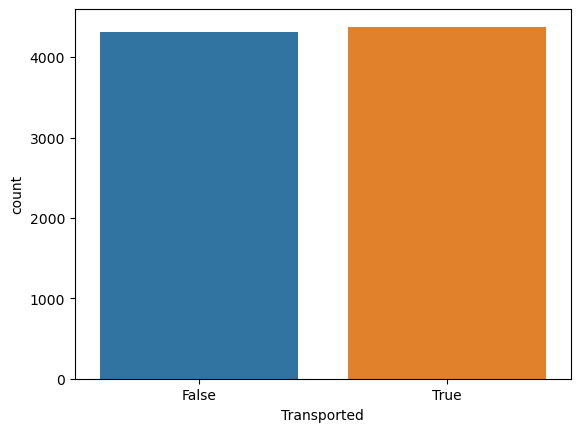

In [84]:
# TARGET COLUMN

print(combined.Transported.value_counts())
sns.countplot(combined.Transported)
plt.show()

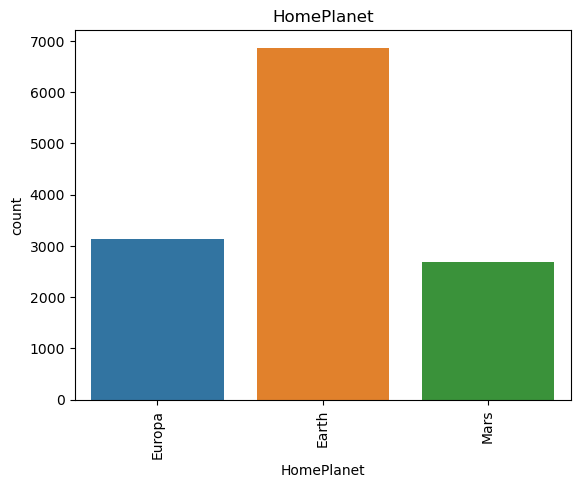

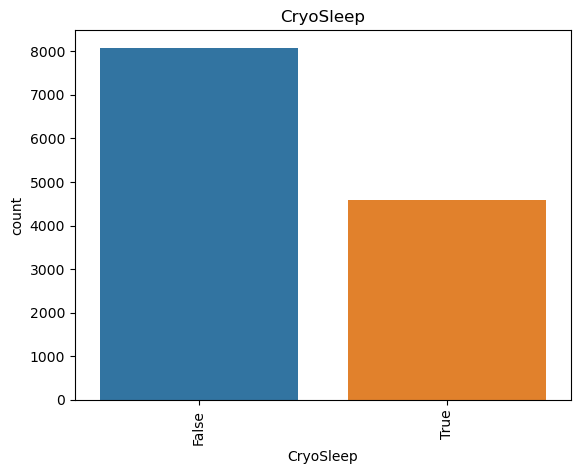

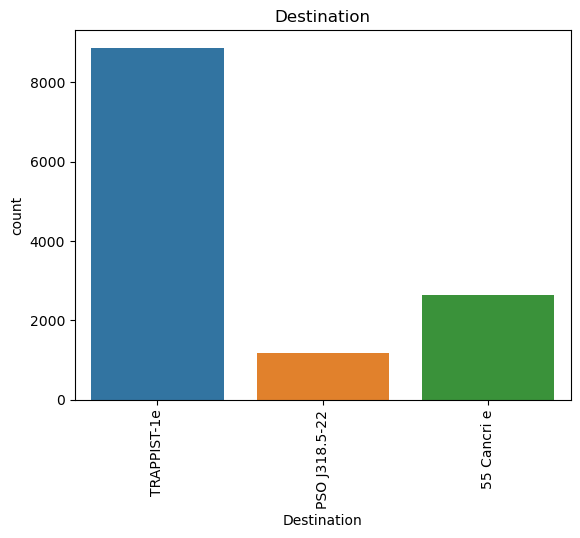

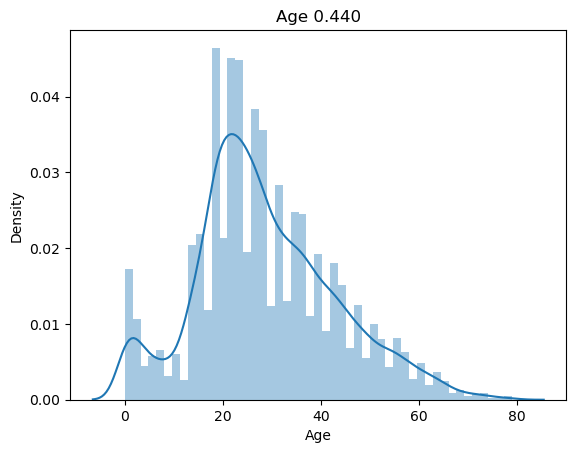

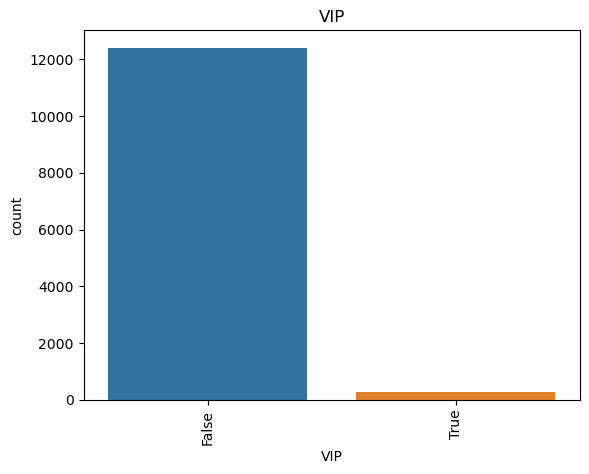

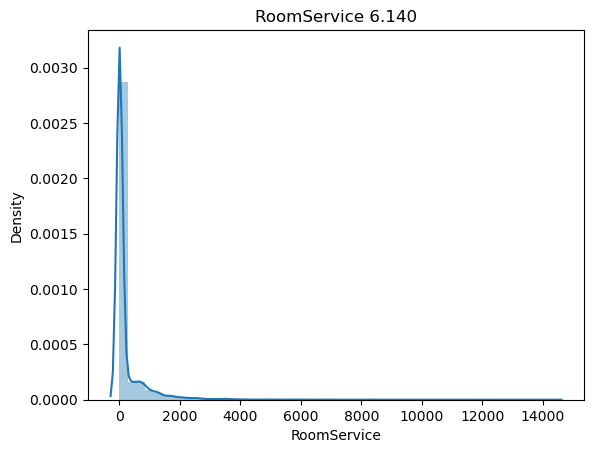

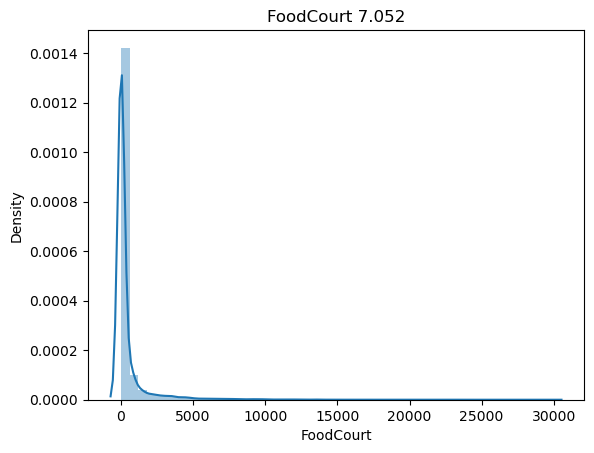

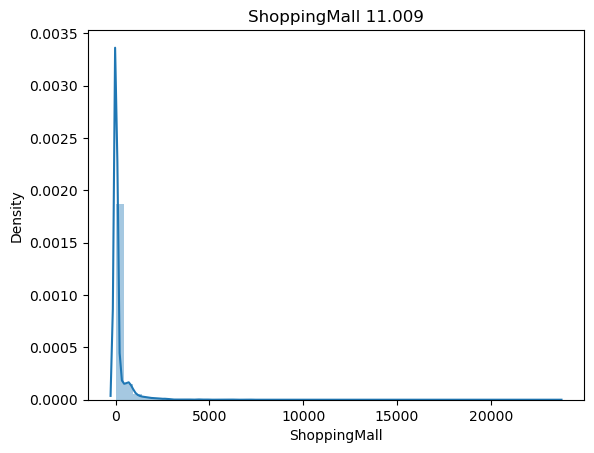

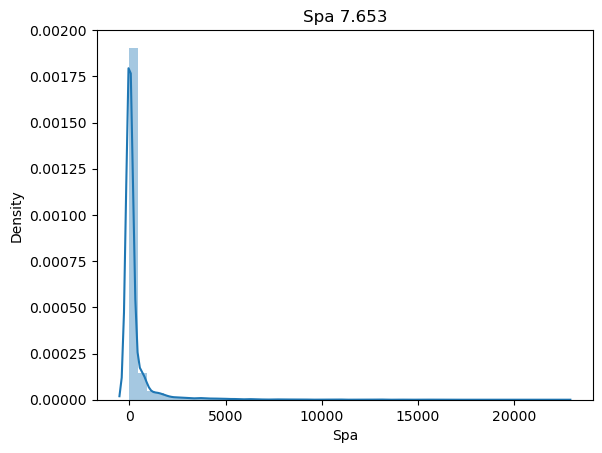

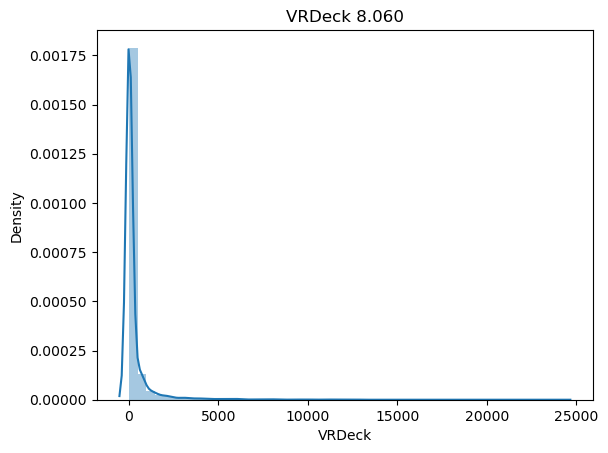

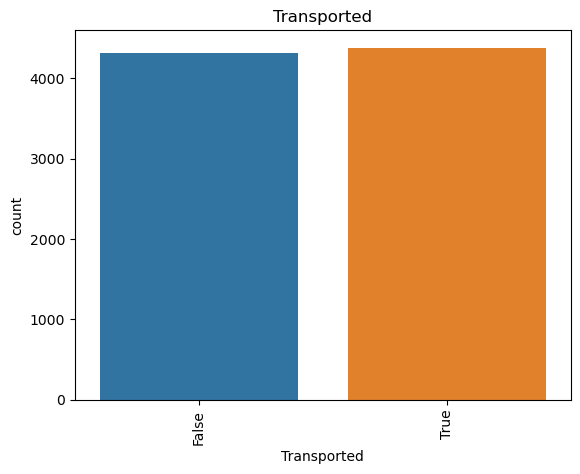

In [85]:
# UNIVARIATE ANALYSIS

for i in ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService',
          'FoodCourt','ShoppingMall','Spa','VRDeck','Transported']:
    if combined[i].dtype != object:
        sns.distplot(combined[i])
        plt.title('%s %.3f'%(i,combined[i].skew()))
        plt.show()
    else:
        sns.countplot(combined[i])
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

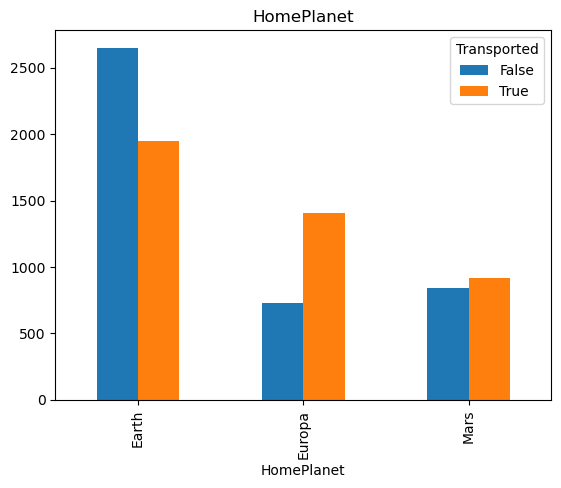

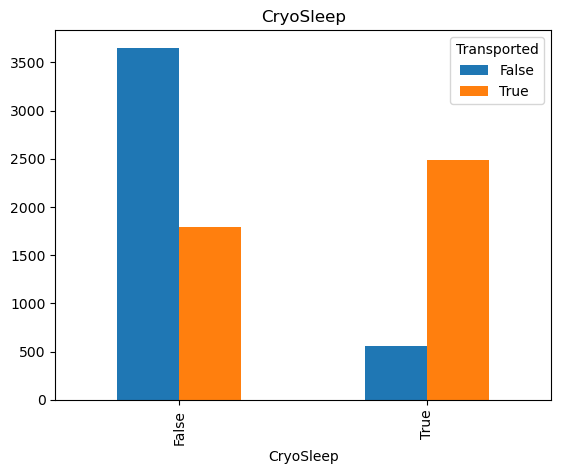

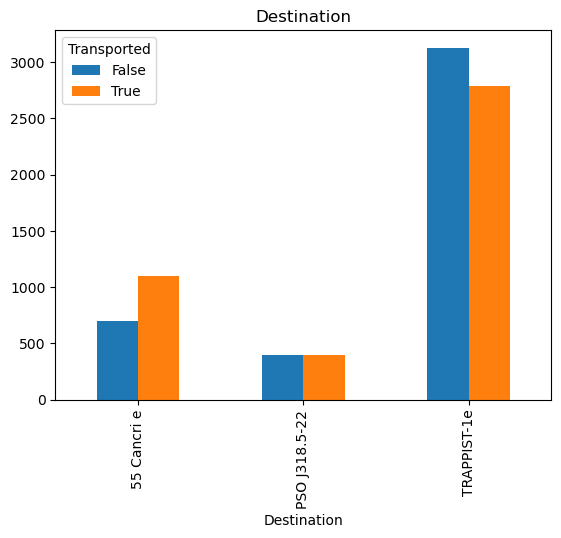

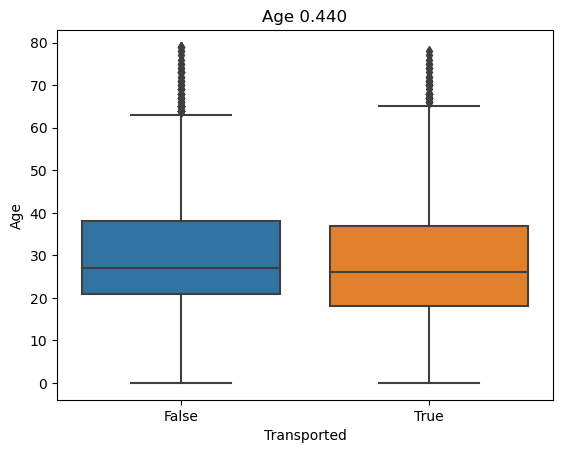

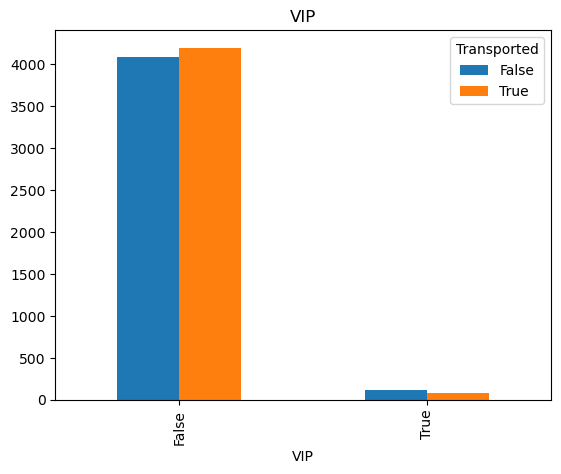

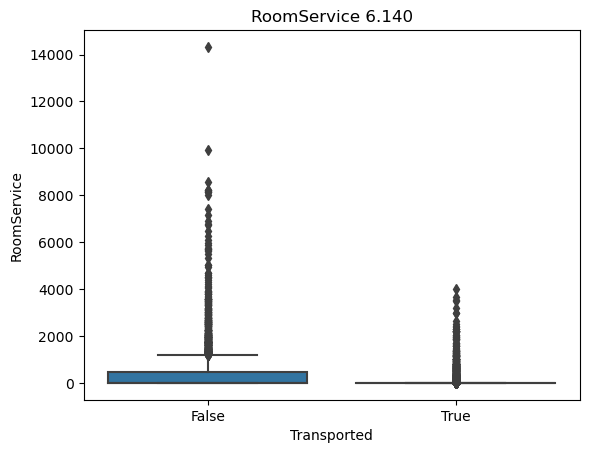

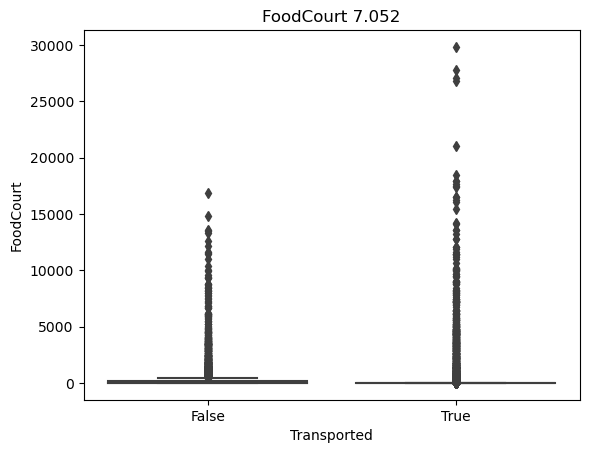

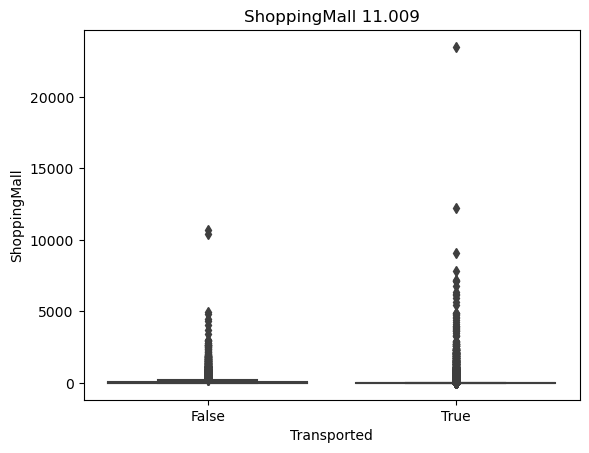

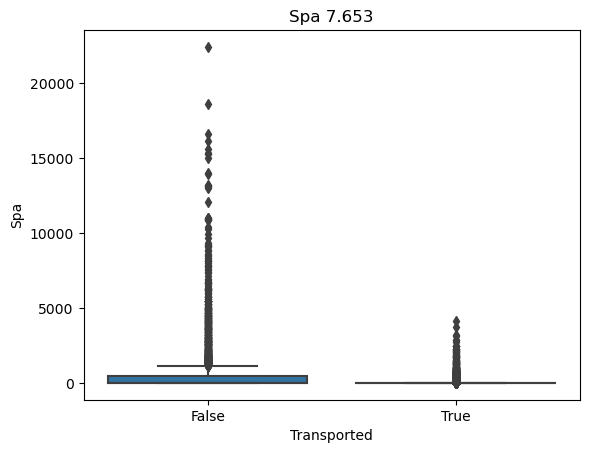

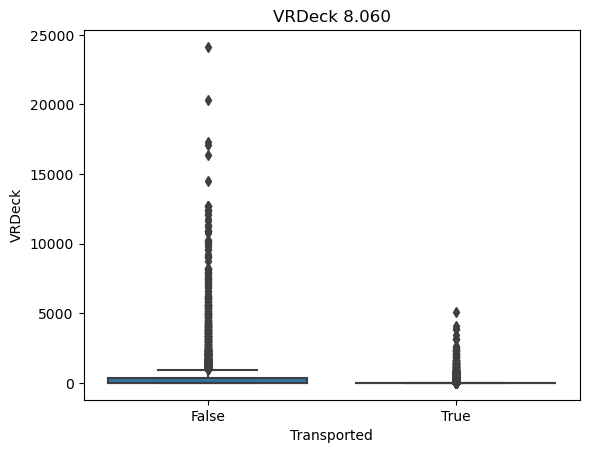

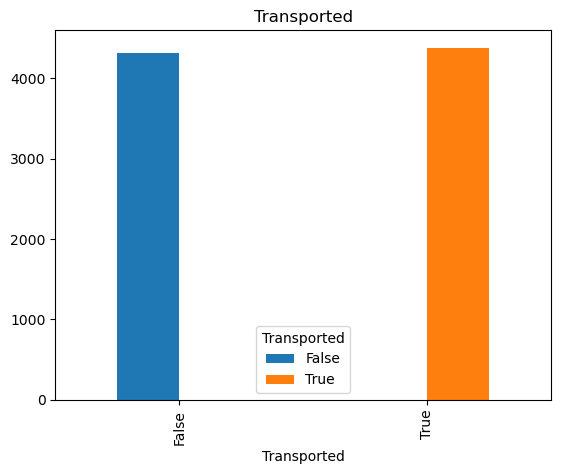

In [86]:
# BIVARIATE ANALYSIS

for i in ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService',
          'FoodCourt','ShoppingMall','Spa','VRDeck','Transported']:
    if combined[i].dtype != object:
        sns.boxplot(combined.Transported,combined[i])
        plt.title('%s %.3f'%(i,combined[i].skew()))
        plt.show()
    else:
        pd.crosstab(combined[i],combined.Transported).plot(kind='bar')
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

In [113]:
# INFERENCES :

# Most of the people are from Earth Planet but the people who transported mostly are from Europa while people from Earth have
# lowest transportaion rate.

# Most of the people choose not to CryoSleep.
# There is very high chance that people who are in CryoSleep (True) are successfully Transported while vice versa.

# Most of the people choose TRAPPIST-1e as their Destination while PSO j318.5-22 is in minority.
# People who choose 55 Cancri e as their Destination have more Transportation rate while got lowest Transportation rate.

# People with Age Group A i.e. from age less than 20, have higher transportation rate.
# People from B group i.e. age less than 40 has less transportation rate than other group but are much higher in number.

In [87]:
# MISSING VALUE TREATMENT

for i in ((combined.isnull().sum()/combined.shape[0])*100)[combined.isnull().sum()>0][:-1].index:
    if combined[i].dtype==object:
        combined[i].fillna(combined[i].mode()[0],inplace=True)
    else:
        combined[i].fillna(combined[i].median(),inplace=True)

In [88]:
# FEATURE MANIPULATION / CREATION

for i in combined.select_dtypes(object):
    print(i,len(combined[i].unique()),combined.shape[0])

PassengerId 12970 12970
HomePlanet 3 12970
Cabin 9825 12970
Destination 3 12970
Name 12629 12970
Transported 3 12970


In [89]:
combined.Cabin

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966     G/160/P
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [90]:
combined.Cabin = combined.Cabin.str.split('/',expand=True)[0]

In [91]:
d = combined.PassengerId.str.split('_',expand=True)[0].value_counts().to_dict()

In [92]:
di = {i:'Not Alone' if d[i] >1 else 'Alone'for i in d}

In [93]:
combined['Members'] = combined.PassengerId.str.split('_',expand=True)[0].map(d)

In [94]:
combined.drop('PassengerId',axis=1,inplace=True)

In [95]:
# FEATURE MANIPULATION / CREATION

combined.drop('Name',axis=1,inplace=True)

In [96]:
x = combined.groupby("Members")['Transported'].value_counts(normalize=True)

In [97]:
li = []
for i in combined.Members.unique():
    li.append(combined[combined.Members==i]['Transported'].value_counts(normalize=True)[True])

<BarContainer object of 8 artists>

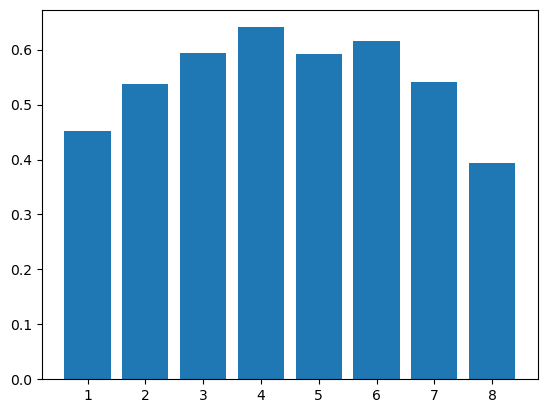

In [98]:
plt.bar(combined.Members.unique(),li)

In [99]:
for i in combined.select_dtypes('O'):
    combined[i] = pd.factorize(combined[i])[0]

In [100]:
combined.Transported[combined.Transported==-1] = np.nan

In [101]:
# SPLITTING THE DATA

In [102]:
X = combined.drop('Transported',axis=1)
y = combined.Transported

In [103]:
ttrain = combined[~combined.Transported.isnull()]
ttest  = combined[combined.Transported.isnull()]

In [104]:
xtrain = ttrain.drop('Transported',axis=1)
ytrain = ttrain.Transported
xtest  = ttest.drop('Transported',axis=1)

In [105]:
for i in xtrain.select_dtypes('O'):
    xtrain[i] = pd.factorize(xtrain[i])[0]
    xtest[i]  = pd.factorize(xtest[i])[0]

In [106]:
X,y = xtrain,ytrain

In [107]:
#IMPORTING THE LIBRARIES AND FUNCTIONS

from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,\
roc_curve,log_loss
from sklearn.model_selection import cross_val_score,StratifiedKFold

# CROSS VALIDATING THE MODELS USING STRATIFIED KFOLD CROSS VALIDATION AND EVALUATING

# CREATING MACHINE INSTANCE

lr  = LogisticRegression()
rg  = RidgeClassifier()
dt  = DecisionTreeClassifier()
rf  = RandomForestClassifier()
xg  = XGBClassifier()
ca  = CatBoostClassifier(verbose=0)
ad  = AdaBoostClassifier()
gb  = GradientBoostingClassifier()
lg  = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
gn  = GaussianNB()
st  = StackingClassifier([('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())],final_estimator=lr,stack_method='predict')

cv = StratifiedKFold(n_splits=5,shuffle=True)

for m in [lr,rg,dt,rf,xg,ca,knn,st]:
    print('\t\t',m,'\n')
    for i,j in cv.split(X,y):
        xtr,xte,ytr,yte = X.loc[i],X.loc[j],y[i],y[j]
        model = m.fit(xtr,ytr)
        pred_tr,pred_te = model.predict(xtr),model.predict(xte)
        print(round(accuracy_score(ytr,pred_tr),4),' , ',round(accuracy_score(yte,pred_te),4))
    print('\n')

		 LogisticRegression() 

0.7824  ,  0.7717
0.7865  ,  0.7752
0.7788  ,  0.7832
0.784  ,  0.7704
0.7769  ,  0.7957


		 RidgeClassifier() 

0.7599  ,  0.7504
0.7547  ,  0.7614
0.7561  ,  0.7556
0.7582  ,  0.7509
0.7554  ,  0.7624


		 DecisionTreeClassifier() 

0.9548  ,  0.7263
0.9556  ,  0.72
0.955  ,  0.7435
0.9556  ,  0.7273
0.9549  ,  0.7284


		 RandomForestClassifier() 

0.9546  ,  0.7901
0.9551  ,  0.7936
0.9551  ,  0.7786
0.9561  ,  0.7745
0.955  ,  0.7814


		 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_de

In [108]:
# BEST BASE PERFORMANCE IS COMING ON CATBOOST CLASSIFIER SO USING IT AS OUR FINAL MODEL

model = ca.fit(X,y)

In [109]:
subm['Transported'] = model.predict(xtest)

In [110]:
subm.Transported.replace({1.0:True,0.0:False},inplace=True)

In [111]:
subm.to_csv('titanic spaceship.csv',index=False)

In [112]:
# kaggle score : 0.79658